<a href="https://colab.research.google.com/github/HemaVK/LendGuard/blob/main/LendGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project:** LendGuard – Predicting Loan Defaults with Machine Learning

**Objective:**
Develop a machine learning model to optimize the loan approval process for Loan Lender by predicting the likelihood of loan default.

**Background:**
Loan Lender faces two critical risks in its loan evaluation process:

***False Approvals:*** Loans approved for borrowers who ultimately default, causing financial losses.

***False Rejections:*** Loans denied to credit-worthy borrowers, leading to missed revenue opportunities.

Currently, loan applications are reviewed manually by underwriters based on parameters such as credit score, income, and debt. This process is time-consuming, subjective, and prone to error.

**Solution:**
This project leverages supervised machine learning techniques to automate and enhance the loan approval process. By analyzing historical loan data, the model learns to:

*   Predict whether a loan is likely to be repaid or defaulted.
*   Improve approval accuracy.
*   Reduce financial risk while increasing revenue potential.

**Tools & Techniques:**

*   Data Cleaning & EDA (Pandas, Numpy, Matplotlib, Seaborn)

*   Feature Engineering

*   Classification Models (Logistic Regression, Random Forest, XGBoost)

*   Model Evaluation (ROC-AUC, Confusion Matrix, Precision/Recall)

*   Hyperparameter Tuning (GridSearchCV)

**Impact:**
The ML-based solution provides a scalable, data-driven approach to underwriting—enabling faster, fairer, and more reliable loan decisions.



**🔍 Data Overview**
This project utilizes a dataset containing approximately 38,000 loan applications sourced from Lending Club. Each record represents a unique loan application, accompanied by a variety of borrower attributes and loan-specific details.

The dataset includes below features:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

#Let's go!

####Data cleaning/Exploration imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
pd.set_option('display.max_columns', None)
# To suppress all warnings
warnings.filterwarnings('ignore')

####Loading Data

In [ ]:
# Load the from dataset/csv file from github into dataframe
url = 'https://raw.githubusercontent.com/HemaVK/LendGuard/refs/heads/main/loans.csv'
df = pd.read_csv(url)

# Get a quick look on the top 5 rows of data to derive some information
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


Observation: int_rate and revol_util have % at the end of the value. And term field have the word months as suffix.
These needs to be handled during data cleaning phase.

In [ ]:
## Check the dataframe structure - datatypes and number of non-null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

In [ ]:
## Check the shape
df.shape

(38770, 23)

In [ ]:
## Check the missing values across the columns
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,1036
home_ownership,0


Observation: For emp_length and revol_util there are missing values which needs to be handled during data cleaning phase.



In [ ]:
# filling/imputing the missing values(NaNs) in the columns emp_length and revol_util with the most frequent value(mode)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mode()[0])

# In term field, removing the suffix months
df['term'] = df.loc[:, 'term'].map(lambda x: x.lstrip(' ').rstrip(' months'))

# removing % from int_rate and revol_util
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%').astype(float)
df['revol_util'] = df['revol_util'].astype(str).str.rstrip('%').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  float64
 2   loan_amnt            38770 non-null  float64
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  float64
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           38770 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  float64
 15  inq_last_6mths       38770 non-null 

##Feature Selection


In [ ]:
## Drop the columns which are not used for analysis and the fields which are not used for approving the loan
df.drop(['id', 'member_id', 'installment', 'last_pymnt_amnt'], axis = 1, inplace = True)
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,5000.0,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,Fully Paid
1,2500.0,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,Charged Off
2,2400.0,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,Fully Paid
3,10000.0,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,Fully Paid
4,5000.0,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,Fully Paid


### 📊 Exploratory Data Analysis (EDA)
Before building our machine learning model, we'll perform an exploratory data analysis to identify the key factors influencing loan default. This preliminary step helps us examine variable distributions, uncover patterns, and understand relationships between features and the target variable.

#### 🔍 Univariate Analysis
To gain initial insights into the dataset, we conduct univariate analysis on key variables. This involves examining the distribution and summary statistics of each feature individually, using appropriate visualizations and descriptive metrics.

The following variables are analyzed:
- `loan_status: Understand the distribution of fully paid vs. defaulted loans.`
- `term: Explore the frequency of different loan terms (e.g., 36 vs. 60 months).`
- `grade: Examine how Lending Club's assigned loan grades are distributed.`
- `purpose: Identify the most common reasons for taking out a loan.`
- `loan_amnt: Assess the distribution of loan amounts requested.`
- `annual_inc: Analyze the range and distribution of applicants' annual incomes.`


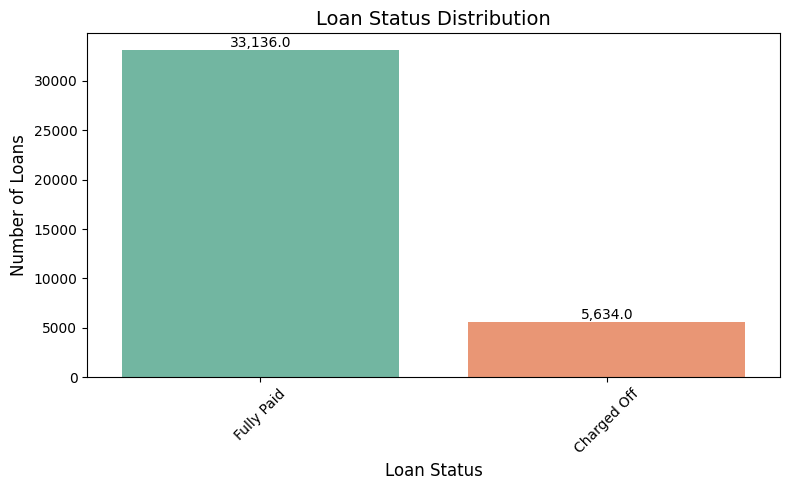

In [ ]:
# Plotting the distribution of loan status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='loan_status', palette='Set2')

# Annotating each bar with its height
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:,}',  # Formats large numbers with commas
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.title('Loan Status Distribution', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() #avoids clipping issues with titles or labels.
plt.show()


**📌 Observation:**
Approximately 85% of the borrowers have successfully repaid their loans, while only 15% have defaulted.
This indicates a class imbalance in the target variable (loan_status), which is important to address during the model-building phase to ensure fair and effective predictions.



🔄 Mapping Loan Status to Binary Values
To facilitate model building, we'll convert the loan_status variable into binary values. Specifically, we'll map:

'Fully Paid' to 0

'Charged Off' and 'Default' to 1

This transformation will help in treating the target variable as a binary classification problem.

In [ ]:
df['loan_status'] = df['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1,
})


🔍 Calculating the Default Rate
The default rate represents the proportion of loans that have defaulted (i.e., loan_status is 1). To calculate it, we take the mean of the loan_status column, which gives the percentage of defaulted loans since 1 corresponds to default and 0 to fully paid.

In [ ]:
round(100 * df['loan_status'].mean(), 2)

np.float64(14.53)

The overall default rate stands at 14.53%. In the upcoming bivariate analysis, we'll explore how this default rate varies across different variables to identify potential factors influencing loan defaults.

Now let's explore the distribution of loan terms by visualizing a count plot. This will help us understand the frequency of different loan terms (e.g., 36 months vs. 60 months) and their impact on loan status.

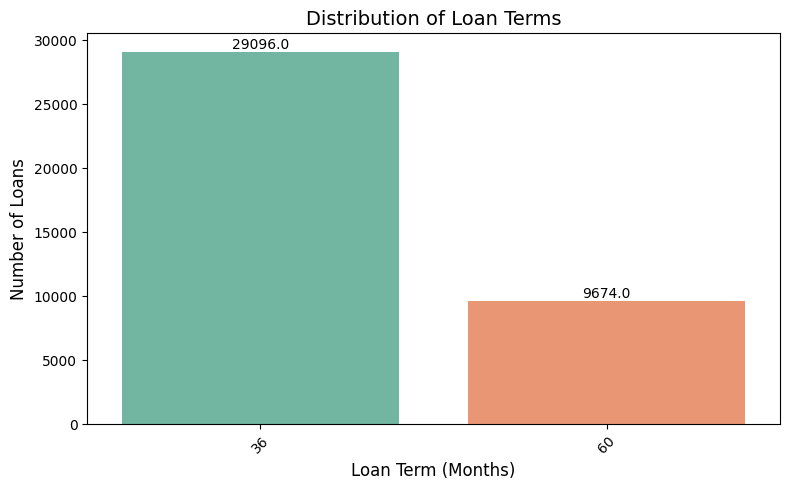

In [ ]:
# Plotting the distribution of loan terms
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='term', data=df, palette='Set2')

# Annotating each bar with its corresponding count
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',  # Display the count on top of each bar
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.title('Distribution of Loan Terms', fontsize=14)
plt.xlabel('Loan Term (Months)', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()  # Prevents clipping of labels
plt.show() #Shows the frequency of different loan terms (e.g., 36-month vs. 60-month loans).


Note: Majority of the loans are of 36 months duration

Next, we will analyze the distribution of loans across different grades. Each loan is assigned a grade, which can give us insights into the risk profile and overall quality of the loans.

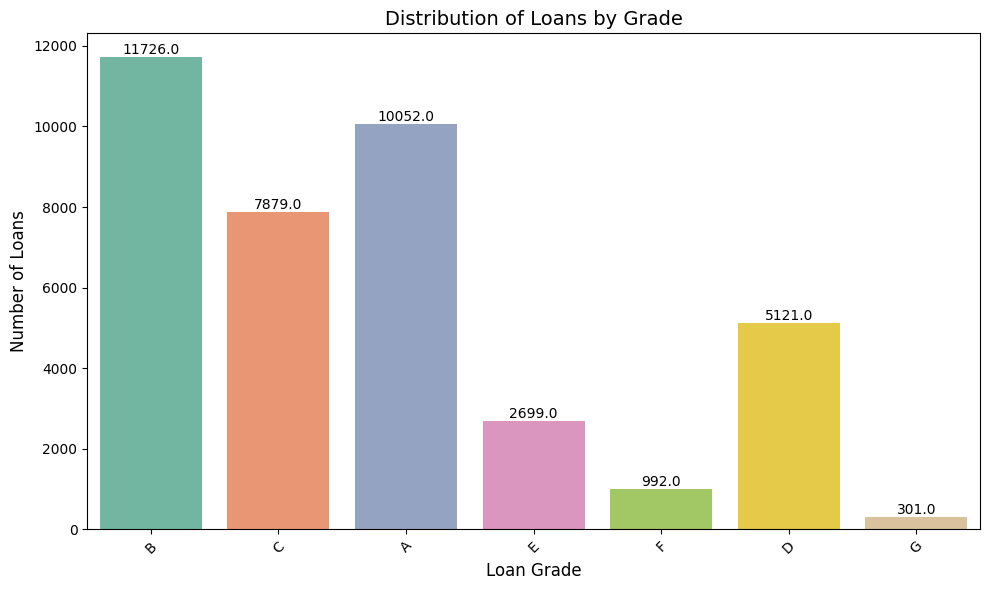

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of loans by grade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='grade', data=df, palette='Set2')  # Customizable color palette

# Adding the count annotations on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',  # Display the count on top of each bar
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Customizing plot appearance
plt.title('Distribution of Loans by Grade', fontsize=14)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for clarity
plt.tight_layout()  # Ensure the plot fits well within the figure
plt.show() #Visualizes the frequency of loans for each grade.


The majority of loans fall under Grade B, followed by Grades A, C, and D in descending order of frequency.

Now, let’s examine the reasons borrowers have applied for loans. The purpose column captures this information, and analyzing its distribution helps us understand the most common loan intents.

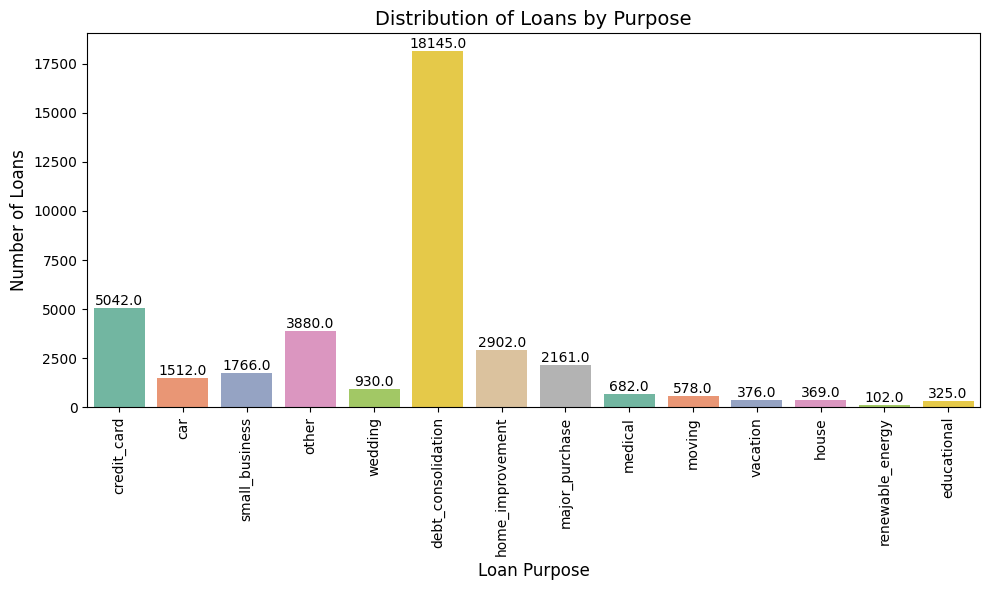

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of loan purposes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='purpose', data=df, palette='Set2')  # Choose a suitable color palette

# Annotating each bar with its count
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.title('Distribution of Loans by Purpose', fontsize=14)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=90)  # Rotate for better label visibility
plt.tight_layout()
plt.show()


The most common reason for taking out a loan is debt consolidation, followed by credit card repayment and home improvement.



In [ ]:
#Let’s begin by reviewing a statistical summary of all numerical variables in the dataset. This provides a quick overview of central tendencies, dispersion, and potential outliers, which will guide our selection of key variables for deeper visual analysis.
df.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
count,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,11069.122388,11.947715,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,48.646399,22.059788,0.145319
std,7362.292600,3.697871,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,28.398310,11.420556,0.352426
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5325.000000,8.940000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,25.100000,13.000000,0.000000
50%,9737.500000,11.780000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,49.100000,20.000000,0.000000
75%,15000.000000,14.420000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,72.200000,29.000000,0.000000
max,35000.000000,24.590000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,1.000000


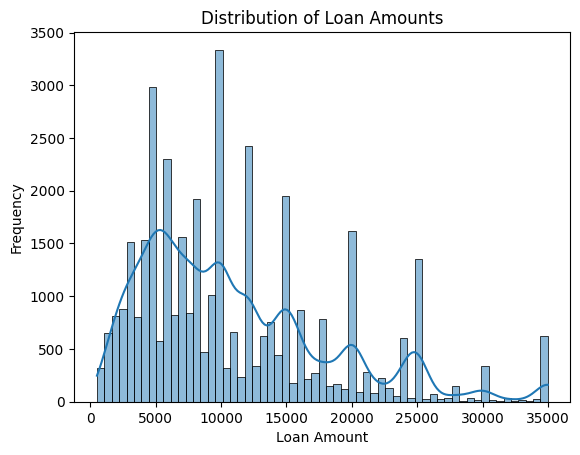

In [ ]:
# To understand how loan amounts are distributed across applicants, we’ll visualize the loan_amnt variable using a histogram.
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


The majority of loans are for amounts below $15,000. Interestingly, there are noticeable peaks at standard intervals—such as $2,500, $5,000, and other round figures—indicating that borrowers tend to request loan amounts in common increments.
This suggests that applicants may round up their requested amounts

Now let’s examine the distribution of interest rates (int_rate) to understand the range and common values among approved loans.

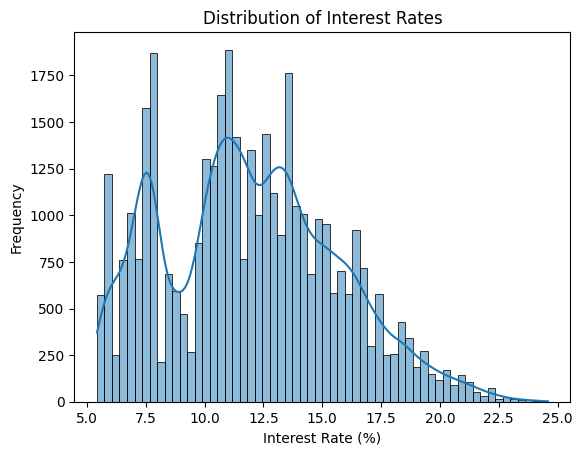

In [ ]:
sns.histplot(df['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


The majority of loans carry an interest rate between 10% and 15%, indicating this range is the most common among approved borrowers.

Let’s explore the distribution of borrowers’ annual income using summary statistics. This will help us understand the central tendency, spread, and potential presence of outliers in the annual_inc variable.

In [ ]:
df['annual_inc'].describe()


,annual_inc
count,3.877000e+04
mean,6.880025e+04
std,6.416132e+04
min,4.000000e+03
25%,4.000000e+04
50%,5.892350e+04
75%,8.200000e+04
max,6.000000e+06


Here is the analysis:
- A high standard deviation indicates a wide spread in income levels.
- The lowest reported income—quite low, possibly part-time
- 25% of borrowers earn less than $40,000.
- The maximum income reported is extremely high—likely an outlier or reporting anomaly.

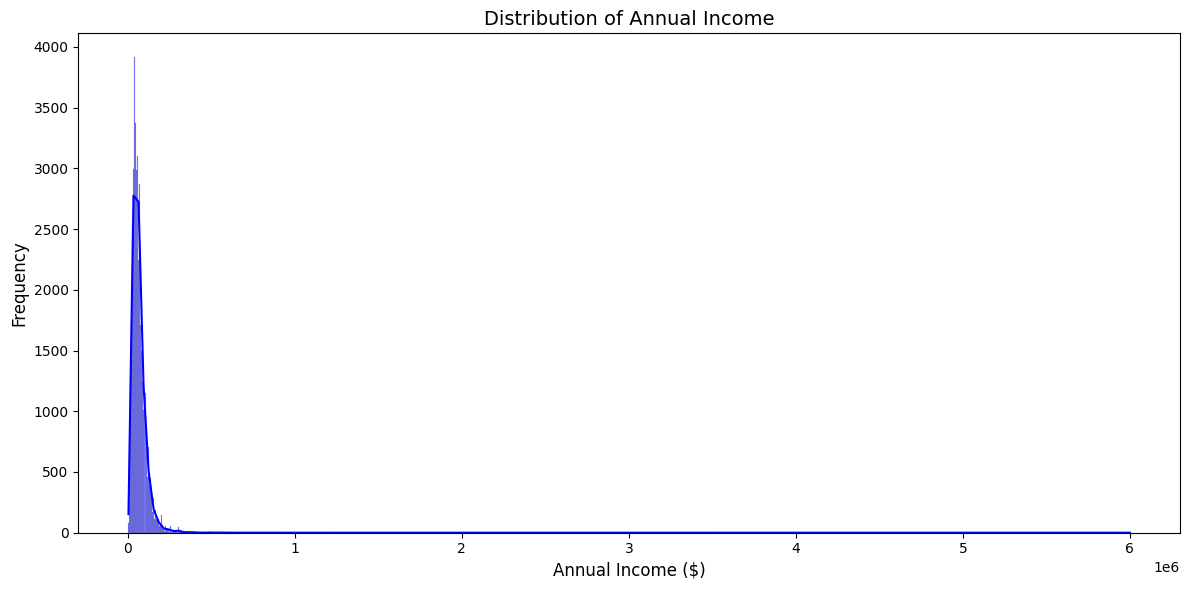

In [ ]:
#To better understand the distribution of annual_inc, let’s plot a histogram with a Kernel Density Estimate (KDE) overlay.
#This will provide both a discrete count of income values and a smoothed curve to identify the underlying distribution pattern.
#It helps identify whether the data is skewed, and any notable peaks or gaps in income distribution.

plt.figure(figsize=(12, 6))
#The histogram bins (set to 1000 for finer granularity) give us more detailed insight into income ranges.
ax = sns.histplot(df['annual_inc'], bins=1000, color='blue', kde=True) #The KDE curve provides a smooth estimate of the distribution of annual incomes.

# Customizing the plot
plt.title('Distribution of Annual Income', fontsize=14)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#85th Percentile of Annual Income
df['annual_inc'].quantile(0.85)

np.float64(100000.0)

This returns the value below which 85% of the data points in the annual_inc column lie. This is useful for identifying the income threshold that separates the top 15% of borrowers from the rest. In our case its 100k

#### 🔍 Bivariate Analysis
In this section, we will examine how the default rate varies across different variables to identify patterns and potential relationships that could influence loan defaults.

We will now visualize the average default rate across different loan grades. This bar plot will help us identify how the likelihood of loan default varies by grade.

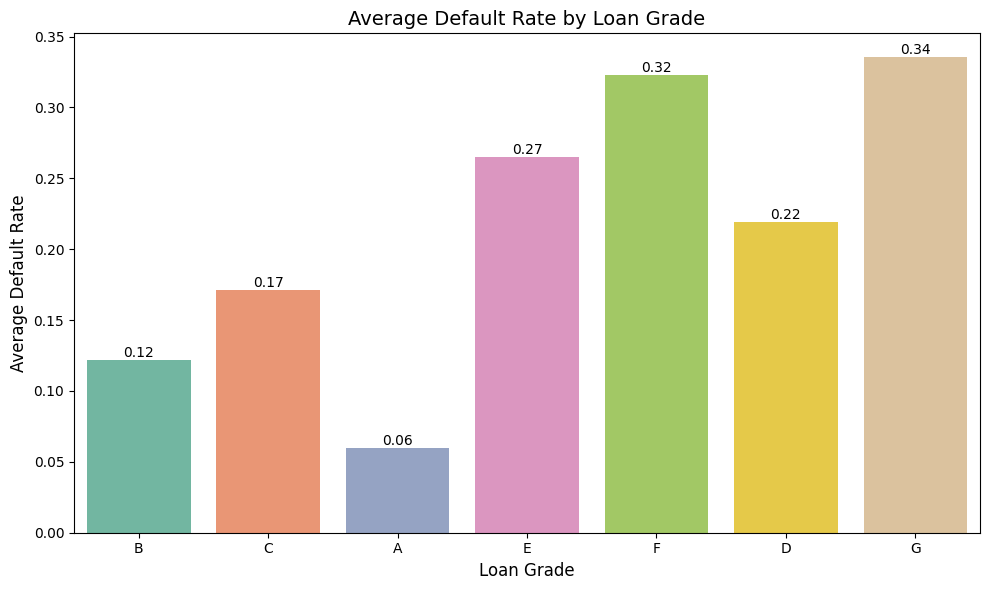

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='grade', y='loan_status', data=df, palette='Set2', ci=None)

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Adding titles and axis labels
plt.title('Average Default Rate by Loan Grade', fontsize=14)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Average Default Rate', fontsize=12)
plt.tight_layout()  # Adjust the plot to prevent label clipping
plt.show()


Observation:
The average default rate rises as the loan grade decreases. Specifically, grades D, E, F, and G exhibit default rates significantly higher than the overall average of 14.53%.

Now, let’s explore how the default rate varies across different loan purposes. This bar plot will help us identify whether specific loan purposes are associated with higher or lower default rates.

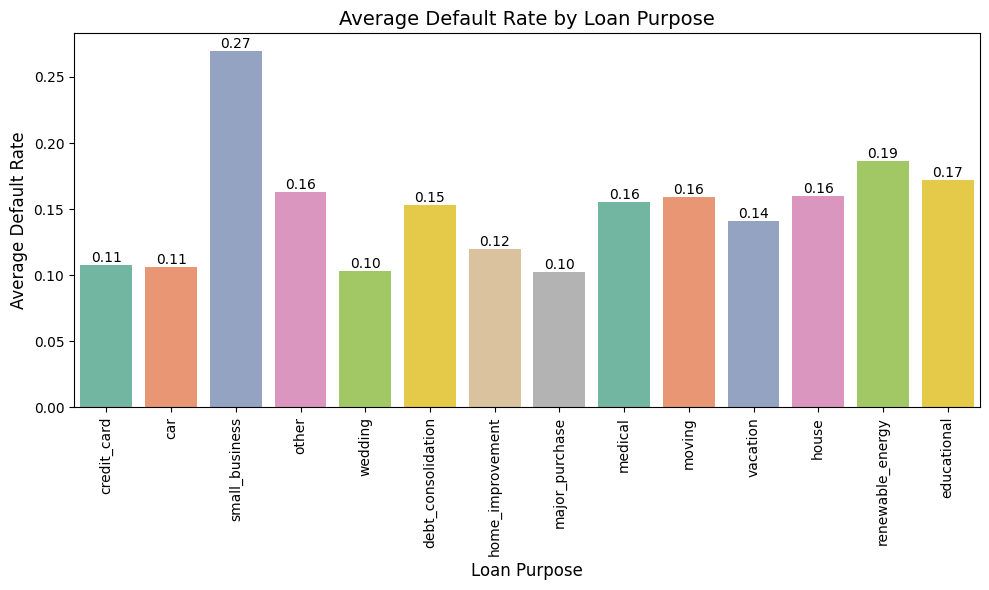

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='purpose', y='loan_status', data=df, palette='Set2', ci=None)

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Adding titles and axis labels
plt.title('Average Default Rate by Loan Purpose', fontsize=14)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Average Default Rate', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust the plot to avoid label clipping
plt.show()


Loans taken for small business purposes have a default rate higher than the overall average.

Let’s analyze how the default rate varies depending on the borrower’s verification status. This bar plot will highlight any significant differences between verified and unverified borrowers in terms of loan default risk.

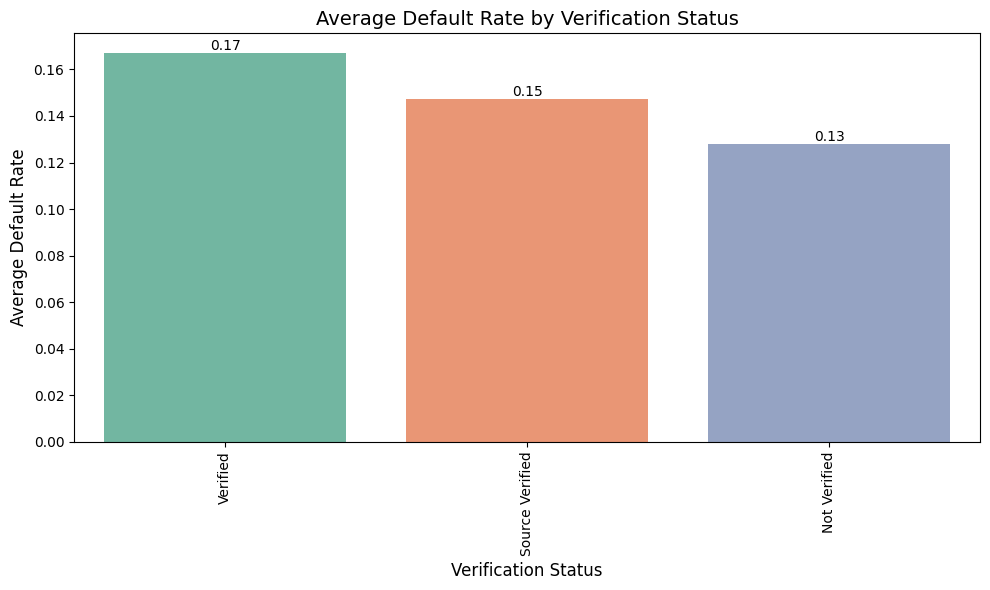

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='verification_status', y='loan_status', data=df, palette='Set2', ci=None)

# Annotating each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Format to two decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Adding titles and axis labels
plt.title('Average Default Rate by Verification Status', fontsize=14)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Average Default Rate', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust the plot to avoid label clipping
plt.show()


Not much difference in the default rates across the verification status levels

Let’s explore whether interest rates play a significant role in identifying loan defaults. We’ll use a box plot to compare the distribution of interest rates between loans that defaulted and those that were fully paid.

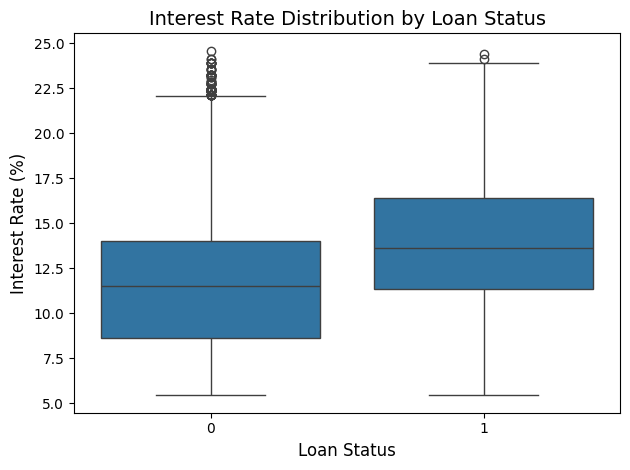

In [ ]:
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate Distribution by Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Interest Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()


Observation:
There is a noticeable difference in the median interest rates between defaulted and non-defaulted loans. This suggests that interest rate could be an important feature for predicting loan defaults in future analysis.

Let’s visualize the correlations between all numerical features in the dataset using a heatmap. This will help us identify which variables are strongly correlated with each other, potentially revealing useful relationships for modeling.

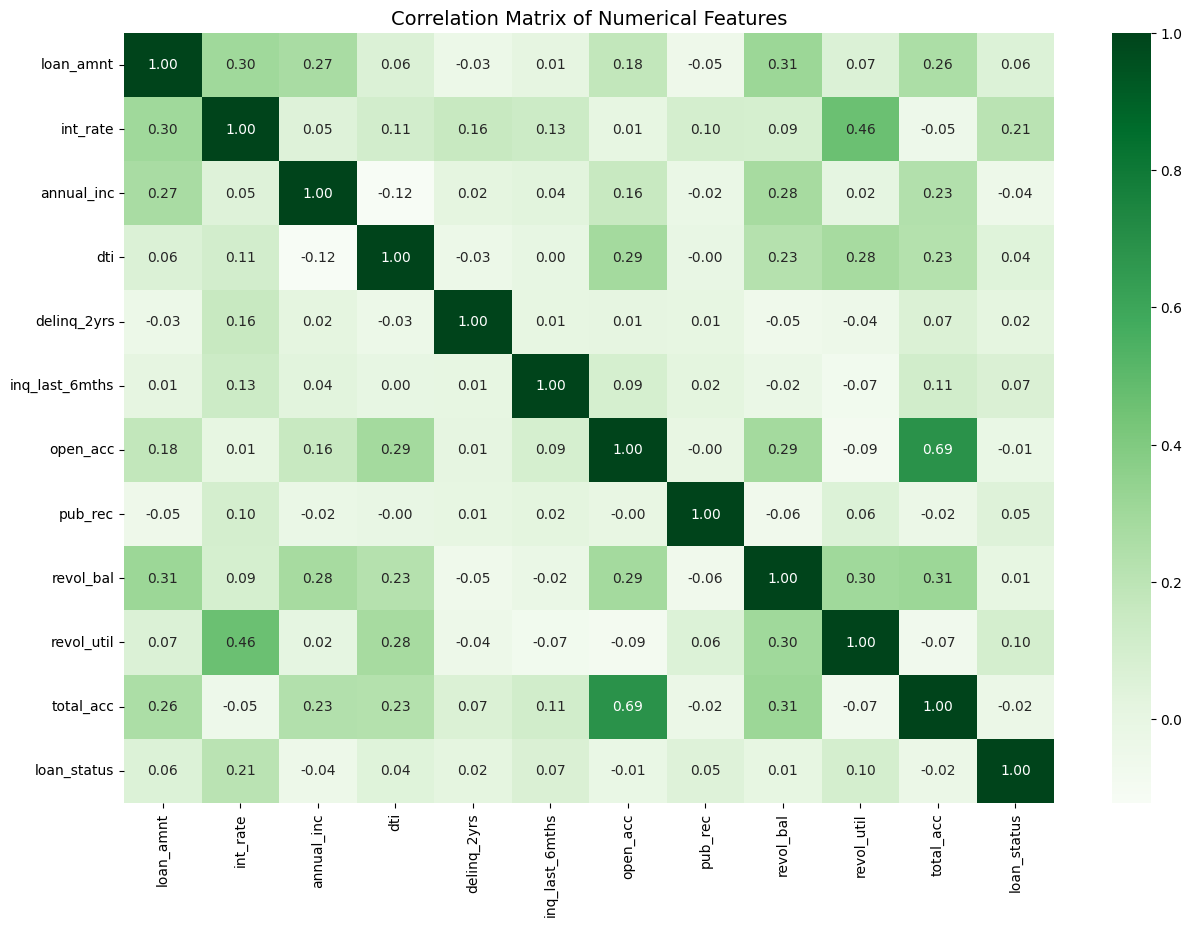

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()


Let’s examine the correlation of all numerical features with the loan_status variable. This will help us identify which features have the strongest relationship with whether a loan defaults or is fully paid.

In [ ]:
loan_status_corr = df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

# Creating a DataFrame for better readability and visualization
sorted_corr_df = loan_status_corr.reset_index()
sorted_corr_df.columns = ['Feature', 'Correlation Coefficient']


In [ ]:
sorted_corr_df

,Feature,Correlation Coefficient
0,loan_status,1.000000
1,int_rate,0.209158
2,revol_util,0.098574
3,inq_last_6mths,0.071596
4,loan_amnt,0.058453
5,pub_rec,0.051062
6,dti,0.044827
7,delinq_2yrs,0.020627
8,revol_bal,0.005721
9,open_acc,-0.009428


We observe a strong correlation between interest rate (int_rate) and loan status (loan_status). This is expected, as higher interest rates are typically assigned to riskier loans, which are more likely to default.

#### Pre-ML Data Preprocessing

Before developing the machine learning model, we will carry out the following steps:
- encoding on all categorical variables
- address class imbalance
- perform train-test split
- feature scaling

In [ ]:
# Cleaning emp_length column
# Check unique values before cleaning
print("Before:", df['emp_length'].unique())

# Remove letters and spaces from the 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'[a-zA-Z]', '', regex=True)  # Remove alphabetic characters
df['emp_length'] = df['emp_length'].str.replace(' ', '')  # Remove spaces

# Check unique values after cleaning
print("After:", df['emp_length'].unique())


Before: ['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
After: ['10+' '<1' '3' '8' '9' '4' '5' '1' '6' '2' '7']


In [ ]:
# Label Encoding for Categorical Variables
# Encoding 'grade' column: Mapping letter grades to numeric values
df['grade'] = df['grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

# **Alternatively:**
# Using string.ascii_uppercase to map grades 'A' to 'G' to numeric values
# df['grade'] = df['grade'].map({char: i for i, char in enumerate(string.ascii_uppercase[:7])})

# Encoding 'sub_grade' column: Mapping sub-grades 'A1' to 'G5' to numeric values
df['sub_grade'] = df['sub_grade'].map({
    'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
    'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
    'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
    'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
    'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
    'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
    'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34
})

# **Alternatively:**
# Using itertools.product with arguments list(range(6)) and string.ascii_uppercase[:7] to create a mapping

# Encoding 'emp_length' column: Mapping employment lengths to numeric values
df['emp_length'] = df['emp_length'].map({
    '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7,
    '8': 8, '9': 9, '10+': 10
})

# **Alternatively:**
# Strip the trailing "+" from "10+", then replace "<1" with 0 and map to integer values
# df['emp_length'] = df['emp_length'].str.replace('10+', '10')
# df['emp_length'] = df['emp_length'].replace('<1', '0').astype(int)


In [ ]:
#One-Hot Encoding for Categorical Variables
# List of categorical variables to apply one-hot encoding
one_hot_encoding_vars = ['home_ownership', 'verification_status', 'purpose']

# Applying one-hot encoding to the specified columns and dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=one_hot_encoding_vars, drop_first=True)


In [ ]:
df.shape

(38770, 35)

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
0,33136
1,5634


**Addressing Class Imbalance**

To address the class imbalance, we'll apply undersampling to balance the distribution of the target variable, ensuring an equal number of 0s (fully paid) and 1s (defaulted loans).

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the shape of the resampled data
X_resampled.shape


(66272, 34)

In [ ]:
from collections import Counter

# Check the distribution of classes in the resampled dataset
Counter(y_resampled)


Counter({0: 33136, 1: 33136})

**Train-test split**

Now that we've addressed the class imbalance, it's time to split the data into training and testing sets. For this, we need to import additional libraries.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25,random_state=100, stratify = y_resampled)
y_train.value_counts()

,count
loan_status,
0,24852
1,24852


**Scaling the features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building and Evaluation

Let's begin with the simplest model: Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=200)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate and print the training accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print('Training Accuracy:', accuracy)


Training Accuracy: 0.8319451150812812


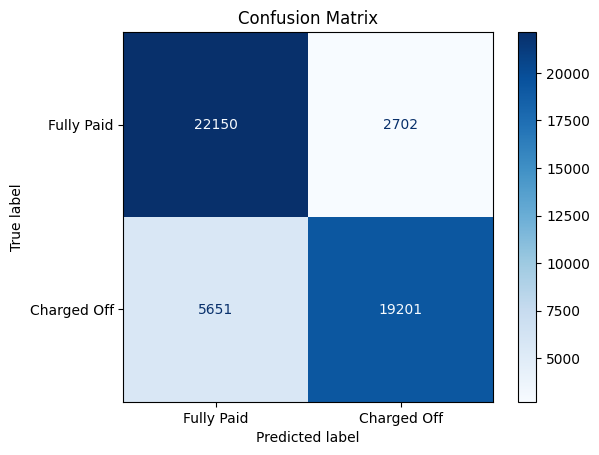

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Display the confusion matrix with labels for the classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fully Paid", "Charged Off"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Set the title and show the plot
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Define the class labels
target_names = ['Fully Paid', 'Charged Off']

# Print the classification report with the specified class labels
print(classification_report(y_train, y_pred_train, target_names=target_names))


              precision    recall  f1-score   support

  Fully Paid       0.80      0.89      0.84     24852
 Charged Off       0.88      0.77      0.82     24852

    accuracy                           0.83     49704
   macro avg       0.84      0.83      0.83     49704
weighted avg       0.84      0.83      0.83     49704



Let's break down the interpretation of these values.

**Precision**
Precision is the proportion of positive predictions that are actually correct.

- For Fully Paid: The precision is 0.80, meaning that 80% of the loans predicted as "Fully Paid" were correctly classified.

- For Charged Off: The precision is 0.88, meaning that 88% of the loans predicted as "Charged Off" were correctly classified.

**Recall**
Recall (also known as Sensitivity) is the proportion of actual positives that were correctly identified by the model.

- For Fully Paid: The recall is 0.89, meaning that 89% of the actual "Fully Paid" loans were correctly identified.

- For Charged Off: The recall is 0.77, meaning that 77% of the actual "Charged Off" loans were correctly identified.

**F1-Score**
F1-Score is the harmonic mean of precision and recall, providing a balance between the two metrics. It's useful when you need a balance between precision and recall.

- For Fully Paid: The F1-score is 0.84, showing a good balance between precision and recall.

- For Charged Off: The F1-score is 0.82, indicating a similar balance, though slightly lower than for "Fully Paid."

**Support**
Support refers to the number of true instances for each class in the dataset.

-For Fully Paid: The support is 24,852, meaning there are 24,852 instances of "Fully Paid" in the training data.

-For Charged Off: The support is also 24,852, meaning there are 24,852 instances of "Charged Off" in the training data.

**Accuracy**
Accuracy is the overall proportion of correct predictions (both classes) to total predictions.

The model's accuracy is 0.83, which means 83% of the total predictions were correct.

**Macro Average**
The macro average computes the unweighted mean of precision, recall, and F1-score across all classes.

Precision: 0.84

Recall: 0.83

F1-Score: 0.83

This tells us that the model performs fairly consistently across both classes, but it slightly favors the "Fully Paid" class in terms of precision.

**Weighted Average**
The weighted average computes the mean of the metrics, weighted by the support (i.e., the number of instances for each class).

Precision: 0.84

Recall: 0.83

F1-Score: 0.83

The weighted average is quite similar to the macro average, which indicates a balanced model performance despite the differences in recall between the two classes.

**Key Takeaways:**
The model performs well overall, with an accuracy of 83%.

The model is slightly better at identifying Fully Paid loans (higher recall), but it has a higher precision for Charged Off loans.

The F1-scores are fairly balanced across both classes, suggesting that the model achieves a good trade-off between precision and recall.

Given the relatively even support for both classes, the model is doing a good job at handling both Fully Paid and Charged Off predictions.

This analysis suggests that the model is reliable but could be fine-tuned to improve the recall for Charged Off loans, potentially by adjusting thresholds or exploring other modeling techniques.

In [ ]:
# Time to predict on the test data
y_pred_test = model.predict(X_test)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.8347416706904877


An accuracy of 83.474% is a solid result. However, accuracy alone doesn’t give the full picture, especially when dealing with class imbalance. It’s essential to look at other metrics, such as precision, recall, F1-score, and the confusion matrix, to fully assess how well the model is performing on both classes.

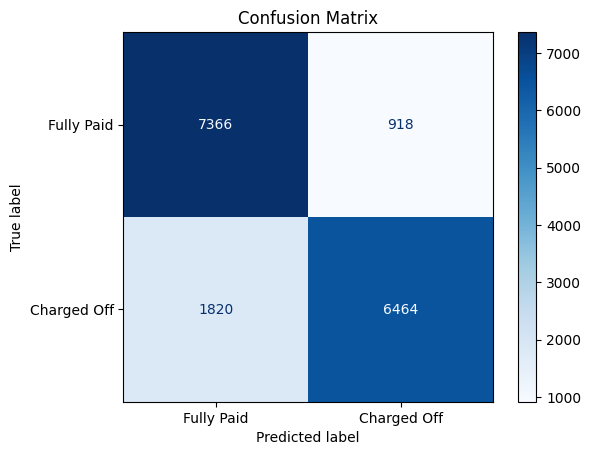

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fully Paid", "Charged Off"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_test, y_pred_test, target_names = target_names))

              precision    recall  f1-score   support

  Fully Paid       0.80      0.89      0.84      8284
 Charged Off       0.88      0.78      0.83      8284

    accuracy                           0.83     16568
   macro avg       0.84      0.83      0.83     16568
weighted avg       0.84      0.83      0.83     16568



###**Analysis:**
- Strong performance on "Fully Paid" loans: The model has excellent recall (0.89) for the majority class, meaning it does well at detecting loans that are fully paid. The precision is a bit lower (0.80), which suggests that some loans are being wrongly predicted as "Fully Paid" when they are not, but overall, the model is still doing well for this class.

- Decent performance on "Charged Off" loans: The recall for "Charged Off" loans (0.78) is lower than for "Fully Paid," meaning that the model is missing some "Charged Off" cases. However, the model still has strong precision (0.88), meaning that when it does predict "Charged Off," it's usually correct.

- Balanced model: The F1-scores are relatively close for both classes (0.84 for "Fully Paid" and 0.83 for "Charged Off"). This indicates a good balance between precision and recall, but there is still room for improvement in capturing more "Charged Off" loans without compromising on false positives.



Though the model is doing well overall with an accuracy of 83%, we need to focus on boosting recall for the "Charged Off" class, as it’s slightly lower than the "Fully Paid" class. Exploring more advanced models could help further improve performance.

In [ ]:
# Extract model coefficients
coefficients = model.coef_

# Get the feature names (assuming X_train is a DataFrame)
feature_names = X.columns

# Create a DataFrame to display feature names alongside their coefficients
coef_df = pd.DataFrame(coefficients[0], index=feature_names, columns=['Coefficient'])

# Sort the DataFrame by coefficients in descending order
coef_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Display the sorted coefficients
print(coef_df)


                                     Coefficient
sub_grade                               6.063628
int_rate                                5.644052
purpose_small_business                  5.086958
purpose_debt_consolidation              4.830423
purpose_educational                     4.693319
purpose_other                           4.659689
purpose_medical                         4.437612
purpose_home_improvement                4.403381
purpose_vacation                        4.216663
purpose_moving                          4.174658
purpose_credit_card                     4.032373
purpose_renewable_energy                4.027264
purpose_major_purchase                  4.017868
purpose_house                           3.878284
purpose_wedding                         3.814355
pub_rec                                 1.738693
home_ownership_OTHER                    1.408161
inq_last_6mths                          1.359926
home_ownership_OWN                      0.897061
home_ownership_RENT 

**Observations**
We observe that int_rate, grade, inq_last_6mths, and annual_inc have a significant influence on the overall probability of loan status, which aligns with the findings from our exploratory data analysis (EDA).

Next, let's implement decision trees and evaluate how the model performance varies.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Retrieve feature importances from the trained model
feature_importances_dt = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the feature importances
import pandas as pd
importance_df_dt = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_dt})
importance_df_dt = importance_df_dt.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df_dt)


                                Feature  Importance
9                        inq_last_6mths    0.268384
1                                  term    0.230630
2                              int_rate    0.055140
6                            annual_inc    0.050550
12                            revol_bal    0.045244
13                           revol_util    0.037631
0                             loan_amnt    0.037131
7                                   dti    0.035664
14                            total_acc    0.030685
10                             open_acc    0.026410
22           purpose_debt_consolidation    0.018832
5                            emp_length    0.017491
4                             sub_grade    0.017448
19  verification_status_Source Verified    0.015493
20         verification_status_Verified    0.015188
11                              pub_rec    0.012555
21                  purpose_credit_card    0.010910
31               purpose_small_business    0.010662
29          

In [ ]:
# Make predictions on the training data using the Decision Tree model
y_pred_dt_train = dt_model.predict(X_train)

# Calculate the accuracy of the Decision Tree model on the training set
accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
print('Training Accuracy:', accuracy_dt)


Training Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Fully Paid', 'Charged Off']
print(classification_report(y_train, y_pred_dt_train, target_names = target_names))

              precision    recall  f1-score   support

  Fully Paid       1.00      1.00      1.00     24852
 Charged Off       1.00      1.00      1.00     24852

    accuracy                           1.00     49704
   macro avg       1.00      1.00      1.00     49704
weighted avg       1.00      1.00      1.00     49704



In [ ]:
y_pred_dt_train = dt_model.predict(X_train)
accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
print('Decision Tree Accuracy:', accuracy_dt)

Decision Tree Accuracy: 1.0


It's clear that the decision tree is overfitting the data. To address this, we can perform hyperparameter tuning to improve the model's generalization and reduce overfitting.

We'll now perform cross-validation to find the best hyperparameters for our decision tree model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],      # Criterion to split nodes
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],      # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],        # Minimum number of samples required at a leaf node
    'max_features': [None, 'auto', 'sqrt'] # Number of features to consider when looking for the best split
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data to find the best parameters
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=1)

In [ ]:
#best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluating on the train set
score = grid_search.score(X_train, y_train)
print("Train Accuracy: ", score)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy:  0.869406888781587


In [ ]:
# Evaluate on the test set
score = grid_search.score(X_test, y_test)
print("Test Accuracy: ", score)

Test Accuracy:  0.8539352969579913


Let's now build random forest models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Display the feature importances in a DataFrame
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df_rf)


                                Feature  Importance
9                        inq_last_6mths    0.133515
1                                  term    0.131164
2                              int_rate    0.073292
6                            annual_inc    0.054359
13                           revol_util    0.050577
12                            revol_bal    0.048039
4                             sub_grade    0.046954
7                                   dti    0.046035
0                             loan_amnt    0.045923
14                            total_acc    0.041112
10                             open_acc    0.040571
5                            emp_length    0.033083
22           purpose_debt_consolidation    0.025717
18                  home_ownership_RENT    0.025359
20         verification_status_Verified    0.024284
3                                 grade    0.023031
8                           delinq_2yrs    0.022944
31               purpose_small_business    0.020418
19  verifica

In [ ]:
#train data
y_pred_rf_train = rf_model.predict(X_train)
accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
print('Random Forest Training Accuracy:', accuracy_rf)

Random Forest Training Accuracy: 1.0


In [ ]:
# test data
y_pred_rf_test = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
print('Random Forest Test Accuracy:', accuracy_rf)

Random Forest Test Accuracy: 0.905902945436987


Random forest is also overfitting. Let's see if we can also improve this

In [ ]:
param_grid = {
    'n_estimators': [100, 200],           # Fewer trees
    'max_depth': [10, 20],                # Shallow trees
    'min_samples_split': [5, 10],         # Small range to test effect of tighter splits
    'min_samples_leaf': [1, 5],           # Checks if regularization improves performance
    'max_features': ['sqrt', 'log2']      # Gives the model two common feature strategies
}


In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=1)

Training Accuracy: 0.9711
Test Accuracy: 0.8988

Classification Report (Test Data):
              precision    recall  f1-score   support

  Fully Paid       0.85      0.96      0.90      8284
 Charged Off       0.96      0.84      0.89      8284

    accuracy                           0.90     16568
   macro avg       0.91      0.90      0.90     16568
weighted avg       0.91      0.90      0.90     16568



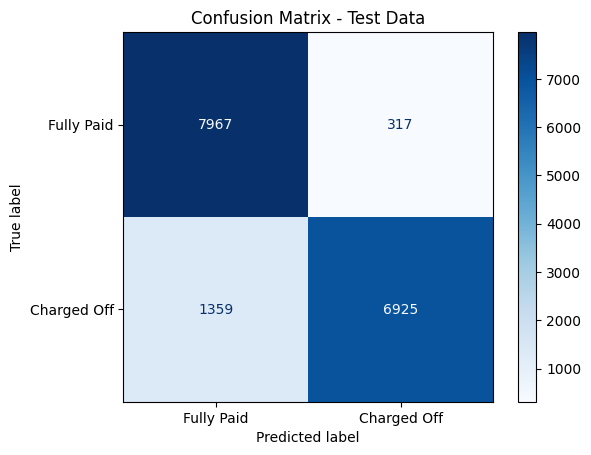

In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
#import matplotlib.pyplot as plt

# Get the best model from GridSearch
best_rf_model = grid_search_rf.best_estimator_

# Predict on training data
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on test data
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=['Fully Paid', 'Charged Off']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fully Paid', 'Charged Off'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Data")
plt.show()
